# Hate Speech Detection using Deep Learning (LSTM)

**Course:** CSE485 – Deep Learning  
**Dataset:** Hate Speech Tweets Dataset  


In [3]:
# OPTIONAL (run once only if dataset is not available locally)
# This cell downloads the dataset from the source and saves it locally

# import pandas as pd
# url = "https://media.geeksforgeeks.org/wp-content/uploads/20250321123144355200/Dataset---Hate-Speech-Detection-using-Deep-Learning.csv"
# df = pd.read_csv(url)
# df.to_csv("data/hate_speech.csv", index=False)


### Environment Setup
This notebook requires the libraries listed in `requirements.txt`.
Additionally, the following NLTK resources must be downloaded:
- stopwords
- wordnet
- omw-1.4

In [4]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
df = pd.read_csv("../data/hate_speech.csv")
df.head()


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df['class'].value_counts()


class
1    19190
2     4163
0     1430
Name: count, dtype: int64

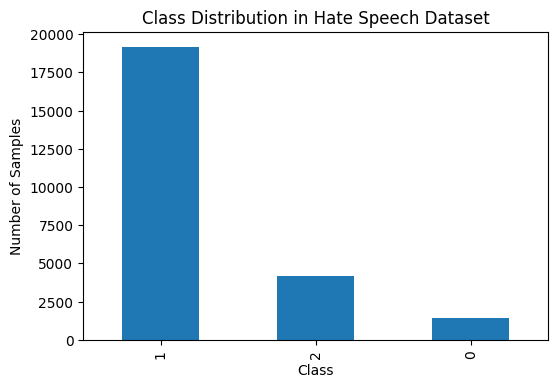

In [7]:
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Hate Speech Dataset")
plt.show()


In [8]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['class']),
    y=df['class']
)

class_weights = dict(zip(np.unique(df['class']), class_weights))
class_weights


{0: 5.776923076923077, 1: 0.43048462741010945, 2: 1.9843862599087196}